In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data_path = '../qa_predictions/20_total_documents/small/'
res_csvs = ["original_position_scores.csv", "reordered_position_scores.csv", "COT_position_scores.csv", "chain_position_scores.csv", "tot_position_scores.csv"]

In [36]:
dfs = []
for csv in res_csvs:
    df = pd.read_csv(data_path + csv).rename(columns={"metric": csv[:-4]})
    dfs.append(df)

In [37]:
# Combine all dataframes as columns
df = pd.concat(dfs, axis=1)
# Remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]


Text(0.5, 1.0, 'Accuracy of QA predictions by position on 20 documents')

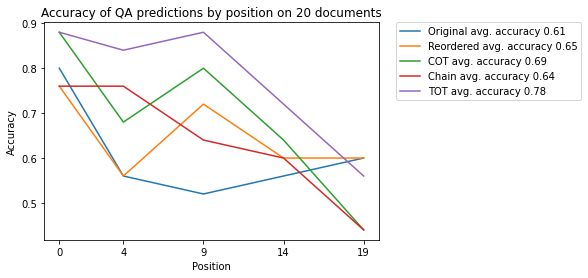

In [42]:
# Plot results with position on x-axis and accuracy score on y-axis.

names = ["Original", "Reordered", "COT", "Chain", "TOT"]
columns = ["original_position_scores", "reordered_position_scores", "COT_position_scores", "chain_position_scores", "tot_position_scores"]
positions = df["position"]
for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, df[columns[i]], label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy of QA predictions by position on 20 documents")